In [7]:
from sklearn import datasets, cluster
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

def generate_data(n_samples, flagc):
    
    if flagc == 1:
        random_state = 365
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        
    elif flagc == 2:
        random_state = 148
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
        X = np.dot(X, transformation)
        
    elif flagc == 3:
        random_state = 148
        X, y = datasets.make_blobs(n_samples=n_samples,
                                   centers = 4,
                              cluster_std=[1.0, 2.5, 0.5, 3.0],
                              random_state=random_state)

    elif flagc == 4:
        X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
        
    elif flagc == 5:
        X, y = datasets.make_moons(n_samples=n_samples, noise=.05)
    
    else:
        X = []
        
    return X

In [8]:
X = generate_data(100, 1)
clusters = np.linspace(2, 20, 19, dtype=int)
crit_funcs = []

In [14]:
k_means = cluster.KMeans(n_clusters=5)
k_means.fit(X)
labels = k_means.predict(X)
color = []
color.append('yellow')
color.append('green')
color.append('blue')
color.append('purple')
color.append('orange')

<Figure size 432x288 with 0 Axes>

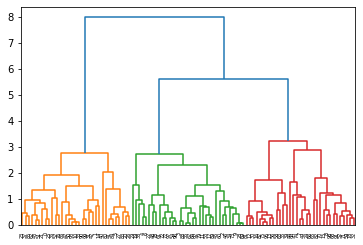

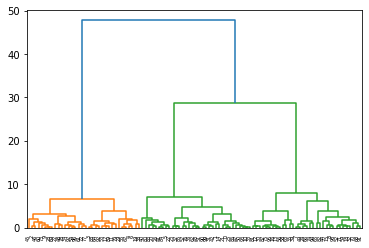

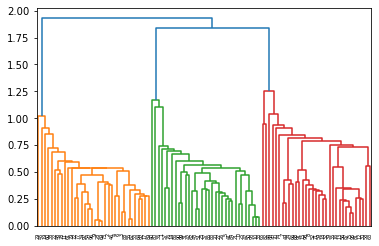

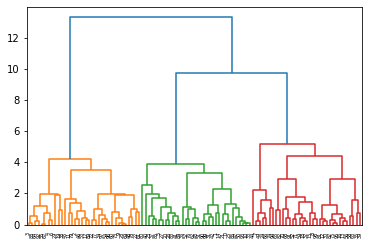

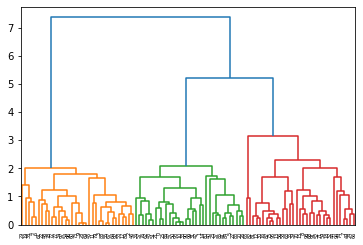

<Figure size 432x288 with 0 Axes>

In [29]:
dendo = dendrogram(linkage(X, method= 'weighted'))
plt.figure(2)
dendo = dendrogram(linkage(X, method= 'ward'))
plt.figure(3)
dendo = dendrogram(linkage(X, method= 'single'))
plt.figure(4)
dendo = dendrogram(linkage(X, method= 'complete'))
plt.figure(5)
dendo = dendrogram(linkage(X, method= 'average'))
plt.figure(6)

In [16]:
x = X[:, 0]
y = X[:, 1]

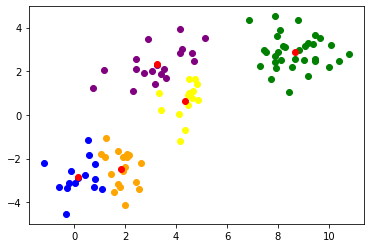

In [20]:
for i in range(5): 
    xL = []
    yL = []
    for k in range(100):
        if labels[k] == i:
            xL.append(x[k])
            yL.append(y[k])

    plt.scatter(xL, yL, c= color[i])
    
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c='red')
plt.show()